# Get Analytical PDFs for 2D histograms in S1-logS2 space: Electronic Recoils

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.optimize import curve_fit
import numpy as np
from scipy.special import erf, erfc
from matplotlib.colors import LogNorm

print("...Starting Notebook...")

...Starting Notebook...


In [4]:
#Set range parameters for the histograms:
logS2Min, logS2Max = 3.5, 5.5
nS2Bins = 40

s1Min, s1Max = 1.5, 100.5
nS1Bins = 99
print( "Using %i Bins" % (nS1Bins*nS2Bins))
print("...Done!")

Using 3960 Bins
...Done!


#### Get the NEST data files; loop through them and add S1c, S2c, and logS2c to lists if they're within the histogram ranges

In [5]:
#get NEST data file
path = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/ERfiles/"
fileList = "ERfile.list"
files = [line.rstrip() for line in open(path+fileList)]
print("Loading %i files..." % len(files))
#sort through, skipping the text header info, and exclude events with R > 700 mm
S1, S2, logS2 = [], [], []
n = 0
for fileName in files:
    print( "%i / 100 (%i events)" % (n, len(S1)) )
    data = [line.rstrip() for line in open(path+fileName)]
    thresh = 0.
    n+=1 
    thisS1, thisS2, thisLogS2 = [], [], []
    for i in range(4, len(data)):
        '''if ( float(i)/float(len(data))*100. > thresh):
            print( "%i / 100" % thresh)
            thresh += 20.'''
        RQs = data[i].split()
        #X,Y = float(RQs[3][:-1]), float(RQs[4][:-1]) #remove commas from X,Y text
        #if ( X*X + Y*Y < 490000 ):
        S1c = float(RQs[9])
        S2c = float(RQs[13])
        logS2c = np.log10(S2c)
        if ( S1c > s1Min and S1c <= s1Max and logS2c > logS2Min and logS2c <= logS2Max ):
            thisS1.append( S1c )
            thisS2.append( S2c )
            thisLogS2.append( logS2c )
    if len(S1) == 0:
        S1 = np.array(thisS1)
        S2 = np.array(thisS2)
        logS2 = np.array(thisLogS2)
    else:
        S1 = np.concatenate( (S1, np.array(thisS1)) )
        S2 = np.concatenate( (S2, np.array(thisS2)) )
        logS2 = np.concatenate( (logS2, np.array(thisLogS2)) )
        if len(S1) > 1e7:
            break
        
    
    
print("...Done!")
print(len(S1), len(S2), len(logS2))

Loading 101 files...
0 / 100 (0 events)


/network/rit/misc/software/jupyterhub/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10


1 / 100 (1663630 events)
2 / 100 (3327892 events)
3 / 100 (4991439 events)
4 / 100 (6656628 events)
5 / 100 (8320805 events)
6 / 100 (9984712 events)
...Done!
11648114 11648114 11648114


#### Visualize the histogram! 

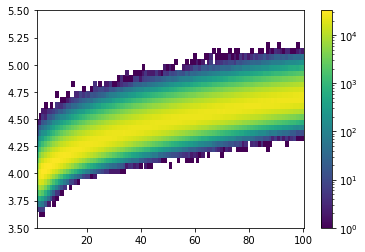

"cm = plt.cm.get_cmap('viridis')\nh2 = plt.hist2d(S1, S2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [10.**logS2Min, 10.**logS2Max]))#, range=([1.5, 100.5], [500, 50000]))\nplt.colorbar(h2[3])\nplt.yscale('log')\nplt.show()\n\ntotalEvents = len(logS2)\nhistZ, histX, histY = np.histogram2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))\nZo, weightedZ = [], []\nxCenter, yCenter = [], []\nbinAreas = []\nfor i in range(nS1Bins):\n    for j in range(nS2Bins):\n        deltaX = histX[i+1]-histX[i]  #S1_binMax - S1_binMin (phd)\n        deltaY = pow(10.,histY[j+1])-pow(10., histY[j])  #10^(logS2/S1 max) - 10^(logS2/S1 min)  [phd/phd]\n        area = deltaX*deltaY # in S1 * S2/S1 space NOT LOG_SPACE!!!\n        xCenter.append( histX[i] + deltaX/2. )\n        yCenter.append( np.mean([histY[j], histY[j+1]]) )# + deltaY/2. )\n        Zo.append( histZ[i][j] )\n        binAreas.append( area )\n        weightedZ.append( float(histZ[i][j])/float(totalEvents)/ar

In [6]:
#Look at the histogram to get starting ranges for logS2/S1
cm = plt.cm.get_cmap('viridis')
h2 = plt.hist2d(S1, logS2, bins=(nS1Bins, nS2Bins), \
                range=([s1Min, s1Max], [logS2Min, logS2Max]), norm=LogNorm())
plt.colorbar(h2[3])
#plt.yscale('log')
plt.show()


#Below is an example of weighting the bins by their phd*phd areas, to convert
#from S1-logS2 space to S1-S2 space. Shouldn't be needed
'''cm = plt.cm.get_cmap('viridis')
h2 = plt.hist2d(S1, S2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [10.**logS2Min, 10.**logS2Max]))#, range=([1.5, 100.5], [500, 50000]))
plt.colorbar(h2[3])
plt.yscale('log')
plt.show()

totalEvents = len(logS2)
histZ, histX, histY = np.histogram2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))
Zo, weightedZ = [], []
xCenter, yCenter = [], []
binAreas = []
for i in range(nS1Bins):
    for j in range(nS2Bins):
        deltaX = histX[i+1]-histX[i]  #S1_binMax - S1_binMin (phd)
        deltaY = pow(10.,histY[j+1])-pow(10., histY[j])  #10^(logS2/S1 max) - 10^(logS2/S1 min)  [phd/phd]
        area = deltaX*deltaY # in S1 * S2/S1 space NOT LOG_SPACE!!!
        xCenter.append( histX[i] + deltaX/2. )
        yCenter.append( np.mean([histY[j], histY[j+1]]) )# + deltaY/2. )
        Zo.append( histZ[i][j] )
        binAreas.append( area )
        weightedZ.append( float(histZ[i][j])/float(totalEvents)/area ) #divide the bin out by its area 
        

print(min(binAreas), max(binAreas))
sc = plt.scatter( xCenter, yCenter, c=weightedZ, s = 10 )
plt.colorbar(sc)
plt.xlim(s1Min, s1Max)
plt.ylim(logS2Min, logS2Max)
plt.show()'''


In [7]:
#get the NR band medians from a flat NR spectrum 
medians = [float(line.rstrip()) for line in open("lzNRmedians.txt")]
print("Loaded NR band means from NR fitting script!")

Loaded NR band means from NR fitting script!


### Start the fitting procedure: define the skew-Gaussian fitting function

Functional form from reference.wolfram.com/language/ref/SkewNormalDistribution.html

In [8]:
def skewGauss(x, xi, omega, alpha, A):
    #xi -- location parameters (Gaussian Equivalent is mu)
    #omega -- scale parameters (Gaussian Equivalent is sigma)
    #alpha -- shape parameters (sets skew amount and direction)
    #A -- just the normalization to make up for not being unity for each S1 bin
    #return A*ss.skewnorm.pdf(x, alpha, xi, omega)
    return (A*np.exp( -0.5*( pow((x - xi)/omega, 2.) ) ) / ( np.sqrt( 2.*np.pi ) * omega ) * erfc( -1.*alpha*(x - xi)/omega/np.sqrt(2.) ))

print("...Done!")

...Done!


In [9]:
#Go through the 2D histogram, and for each  row of S1 bins, get the logS2 distributions
totalEvents = len(logS2)
histZ, histX, histY = np.histogram2d(S1, logS2, bins=(nS1Bins, nS2Bins), range=([s1Min, s1Max], [logS2Min, logS2Max]))
print("Made the histogram!")

Made the histogram!


#### Take the 2D numpy histogram, and fit a skew-gaussian for each S1-bin; 
#### Save the best fit parameters as functions of S1c

0 2.5 1.5
43100.0
Plotting....
[3.93210629e+00 1.06080929e-01 1.08124436e+00 2.13570464e+03]


1 3.5 2.5
119312.0
Plotting....
[3.93836502e+00 1.10680369e-01 1.21535063e+00 5.91460790e+03]


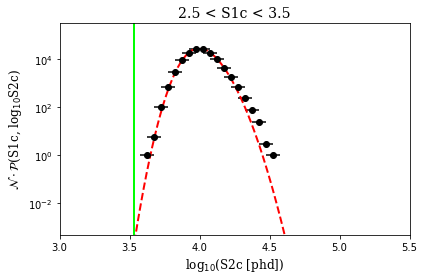

2 4.5 3.5
142187.0
Plotting....
[3.95934738e+00 1.11334335e-01 1.22116246e+00 7.04738894e+03]


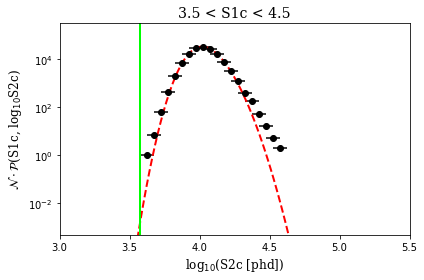

3 5.5 4.5
140808.0
Plotting....
[3.98257700e+00 1.12884642e-01 1.33360016e+00 6.97227103e+03]


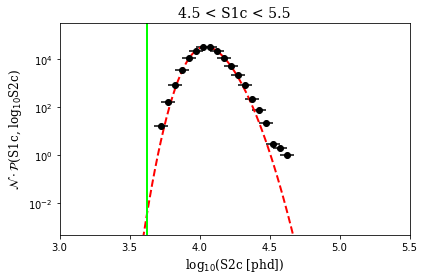

4 6.5 5.5
137388.0
Plotting....
[4.00224086e+00 1.15553902e-01 1.52151119e+00 6.80104723e+03]


5 7.5 6.5
135466.0
Plotting....
[4.02007135e+00 1.18552226e-01 1.67223367e+00 6.72358202e+03]


6 8.5 7.5
132655.0
Plotting....
[4.03704907e+00 1.20651342e-01 1.76593093e+00 6.59482847e+03]


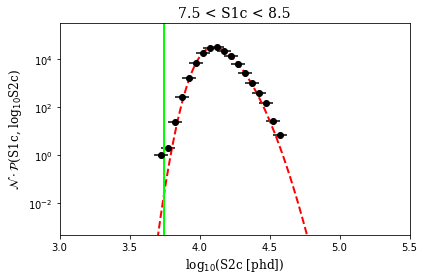

7 9.5 8.5
131438.0
Plotting....
[4.05329584e+00 1.21594289e-01 1.80459110e+00 6.53629428e+03]


8 10.5 9.5
129379.0
Plotting....
[4.06747341e+00 1.24694059e-01 1.94126153e+00 6.44601629e+03]


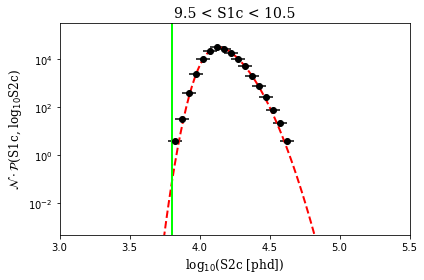

9 11.5 10.5
127758.0
Plotting....
[4.08300163e+00 1.24967978e-01 1.88247497e+00 6.37455479e+03]


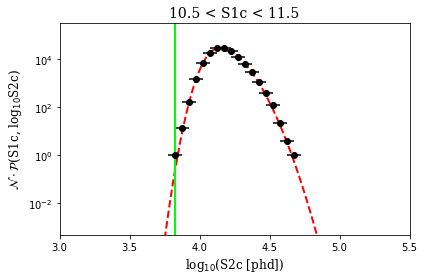

10 12.5 11.5
126379.0
Plotting....
[4.09663452e+00 1.26158638e-01 1.92707450e+00 6.30978953e+03]


11 13.5 12.5
124807.0
Plotting....
[4.10886693e+00 1.28020341e-01 1.96819266e+00 6.23323330e+03]


12 14.5 13.5
124490.0
Plotting....
[4.12079544e+00 1.29098554e-01 1.99069091e+00 6.22619979e+03]


13 15.5 14.5
122829.0
Plotting....
[4.13287409e+00 1.30063417e-01 1.98292238e+00 6.14253863e+03]


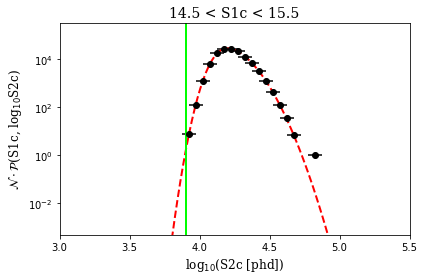

14 16.5 15.5
121941.0
Plotting....
[4.14602731e+00 1.29578527e-01 1.92652769e+00 6.10130377e+03]


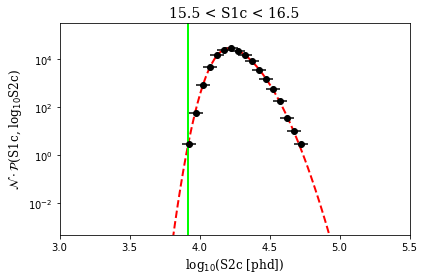

15 17.5 16.5
121803.0
Plotting....
[4.15505950e+00 1.32307815e-01 1.96540282e+00 6.11087107e+03]


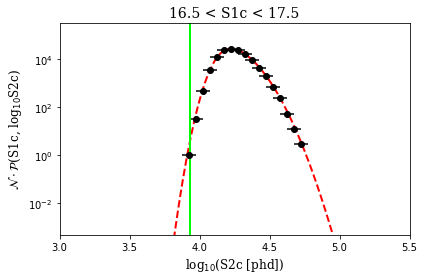

16 18.5 17.5
120703.0
Plotting....
[4.16658080e+00 1.31273051e-01 1.93004088e+00 6.04242523e+03]


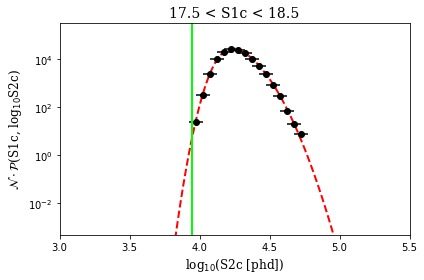

17 19.5 18.5
120482.0
Plotting....
[4.17641744e+00 1.32825362e-01 1.92054219e+00 6.04958799e+03]


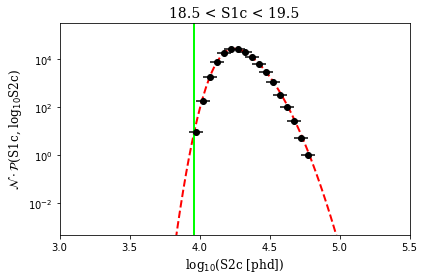

18 20.5 19.5
119922.0
Plotting....
[4.18705651e+00 1.32322808e-01 1.87914951e+00 6.01251607e+03]


19 21.5 20.5
119043.0
Plotting....
[4.19729566e+00 1.31894058e-01 1.84977608e+00 5.96556433e+03]


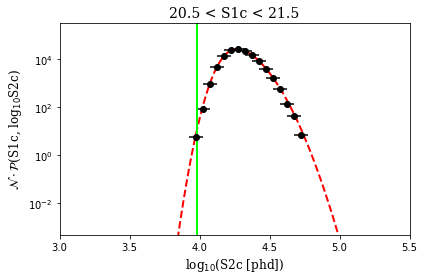

20 22.5 21.5
119190.0
Plotting....
[4.20647676e+00 1.33464153e-01 1.86878580e+00 5.98210787e+03]


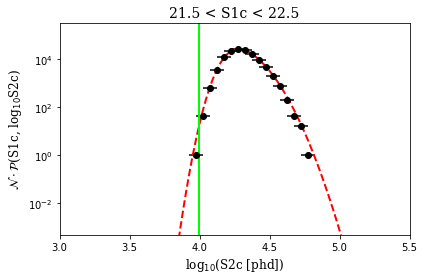

21 23.5 22.5
118978.0
Plotting....
[4.21718271e+00 1.31912247e-01 1.74749338e+00 5.96965261e+03]


22 24.5 23.5
118475.0
Plotting....
[4.22433443e+00 1.33908842e-01 1.83578206e+00 5.94401536e+03]


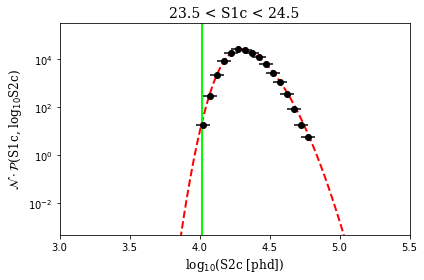

23 25.5 24.5
118335.0
Plotting....
[4.23549412e+00 1.31962426e-01 1.73711153e+00 5.93567560e+03]


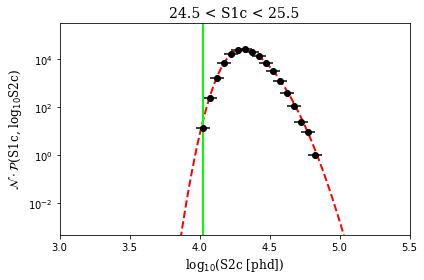

24 26.5 25.5
118106.0
Plotting....
[4.24326516e+00 1.32431636e-01 1.72275730e+00 5.92794385e+03]


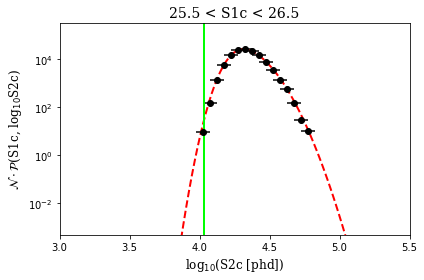

25 27.5 26.5
118000.0
Plotting....
[4.25211634e+00 1.32070067e-01 1.72330938e+00 5.91482980e+03]


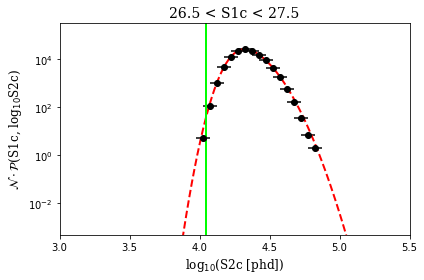

26 28.5 27.5
117615.0
Plotting....
[4.26181765e+00 1.30617097e-01 1.63605868e+00 5.90111412e+03]


27 29.5 28.5
117970.0
Plotting....
[4.27025731e+00 1.31276160e-01 1.63373430e+00 5.91761650e+03]


28 30.5 29.5
116800.0
Plotting....
[4.27744522e+00 1.31848157e-01 1.64690030e+00 5.86217994e+03]


29 31.5 30.5
117404.0
Plotting....
[4.28527111e+00 1.31795650e-01 1.62973484e+00 5.88578206e+03]


30 32.5 31.5
116557.0
Plotting....
[4.29379695e+00 1.30988840e-01 1.57349515e+00 5.84691963e+03]


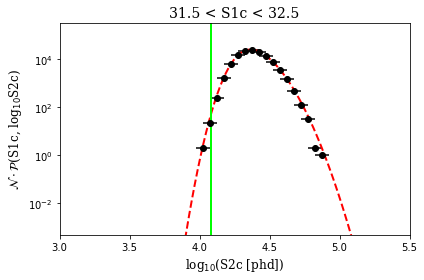

31 33.5 32.5
117079.0
Plotting....
[4.29930597e+00 1.32439850e-01 1.62218908e+00 5.87803354e+03]


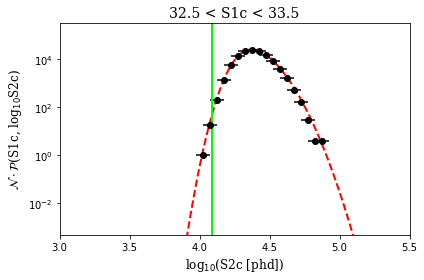

32 34.5 33.5
116693.0
Plotting....
[4.30746641e+00 1.31200001e-01 1.57482809e+00 5.85459354e+03]


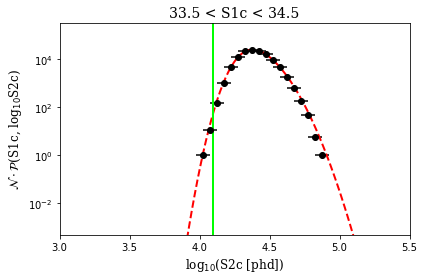

33 35.5 34.5
116501.0
Plotting....
[4.31595648e+00 1.30700127e-01 1.53942538e+00 5.84595933e+03]


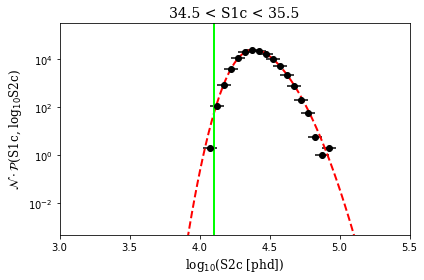

34 36.5 35.5
116287.0
Plotting....
[4.32196542e+00 1.31177771e-01 1.58198569e+00 5.82929460e+03]


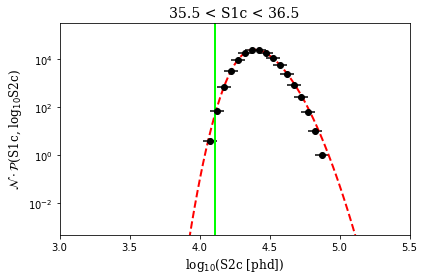

35 37.5 36.5
116004.0
Plotting....
[4.32966946e+00 1.30634061e-01 1.53393923e+00 5.81751450e+03]


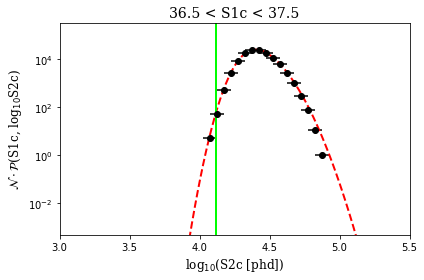

36 38.5 37.5
116476.0
Plotting....
[4.33407100e+00 1.32552012e-01 1.61320059e+00 5.84094165e+03]


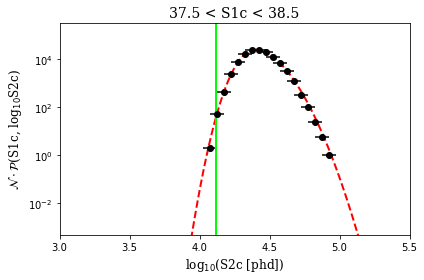

37 39.5 38.5
116149.0
Plotting....
[4.34305451e+00 1.30592157e-01 1.51583149e+00 5.82293143e+03]


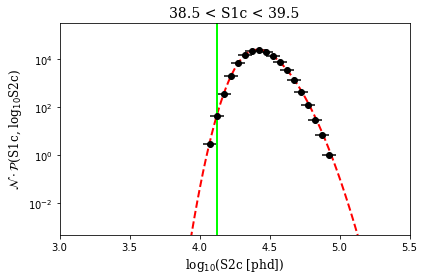

38 40.5 39.5
116193.0
Plotting....
[4.34905663e+00 1.30305940e-01 1.52726698e+00 5.82600420e+03]


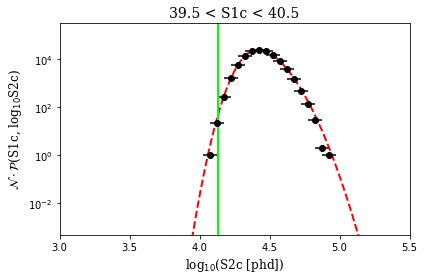

39 41.5 40.5
116101.0
Plotting....
[4.35456689e+00 1.31457297e-01 1.54760276e+00 5.82585380e+03]


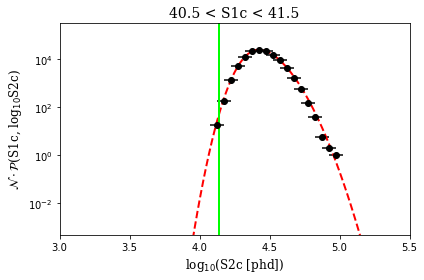

40 42.5 41.5
115357.0
Plotting....
[4.36321328e+00 1.29029749e-01 1.46102227e+00 5.78363145e+03]


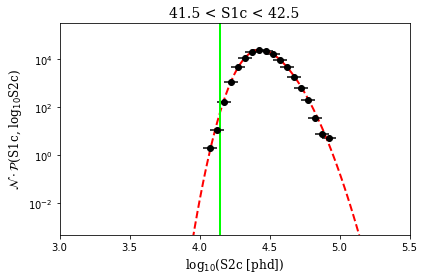

41 43.5 42.5
116102.0
Plotting....
[4.36883717e+00 1.30180791e-01 1.48842694e+00 5.82301654e+03]


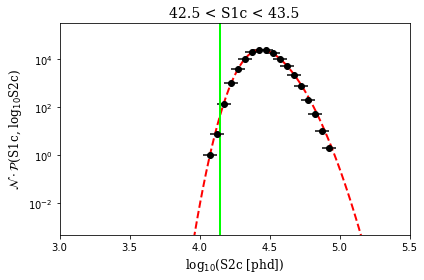

42 44.5 43.5
116148.0
Plotting....
[4.37544147e+00 1.29875392e-01 1.47782572e+00 5.82706030e+03]


43 45.5 44.5
116200.0
Plotting....
[4.38097510e+00 1.30019755e-01 1.48803264e+00 5.82841639e+03]


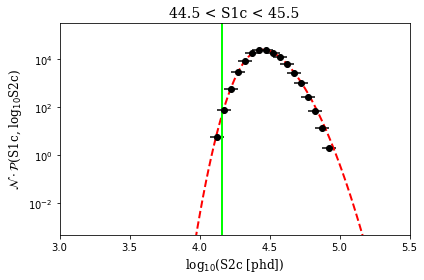

44 46.5 45.5
116262.0
Plotting....
[4.38791568e+00 1.28867536e-01 1.45120971e+00 5.82801951e+03]


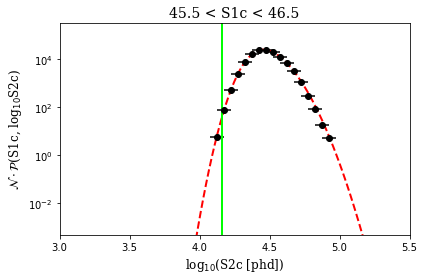

45 47.5 46.5
115491.0
Plotting....
[4.39334753e+00 1.29066477e-01 1.45185024e+00 5.79296077e+03]


46 48.5 47.5
115302.0
Plotting....
[4.39985135e+00 1.28428898e-01 1.43551100e+00 5.78135700e+03]


47 49.5 48.5
115373.0
Plotting....
[4.40365786e+00 1.29486981e-01 1.47530074e+00 5.78717276e+03]


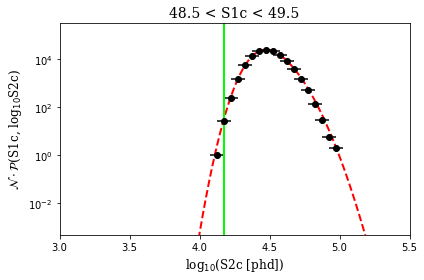

48 50.5 49.5
115774.0
Plotting....
[4.41092473e+00 1.28052575e-01 1.43427973e+00 5.79964616e+03]


49 51.5 50.5
115224.0
Plotting....
[4.41620942e+00 1.28825553e-01 1.45457217e+00 5.77642703e+03]


50 52.5 51.5
115799.0
Plotting....
[4.42225223e+00 1.28172323e-01 1.43033232e+00 5.80840616e+03]


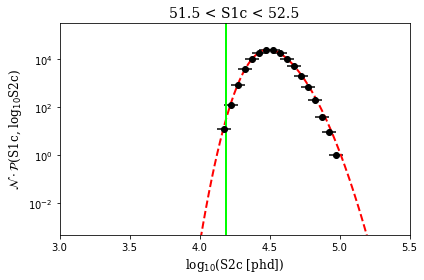

51 53.5 52.5
115493.0
Plotting....
[4.42746599e+00 1.27737548e-01 1.44052856e+00 5.78474722e+03]


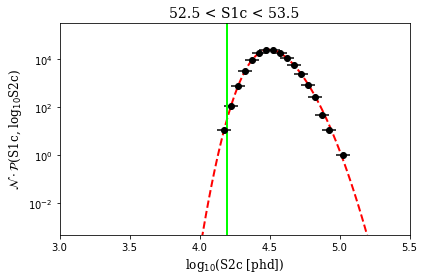

52 54.5 53.5
115357.0
Plotting....
[4.43310175e+00 1.28201257e-01 1.41055411e+00 5.78207072e+03]


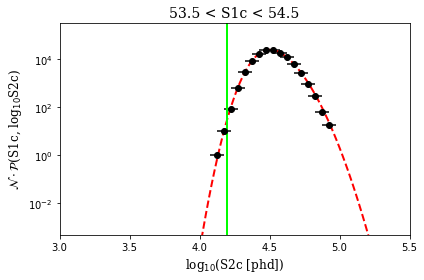

53 55.5 54.5
115488.0
Plotting....
[4.43998869e+00 1.25811273e-01 1.37190962e+00 5.78009403e+03]


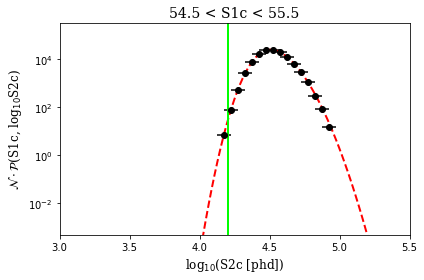

54 56.5 55.5
115627.0
Plotting....
[4.44597191e+00 1.25365176e-01 1.33973931e+00 5.79541833e+03]


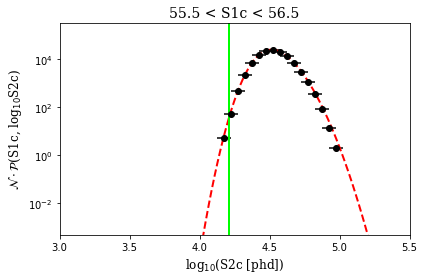

55 57.5 56.5
115308.0
Plotting....
[4.44961786e+00 1.27271493e-01 1.40359224e+00 5.77540978e+03]


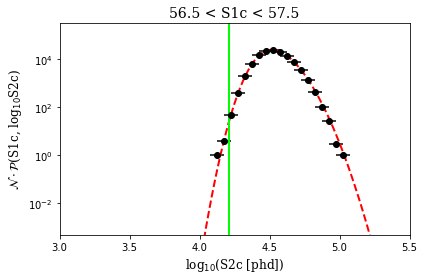

56 58.5 57.5
115720.0
Plotting....
[4.45510667e+00 1.26767799e-01 1.37505034e+00 5.80344535e+03]


57 59.5 58.5
115466.0
Plotting....
[4.45852191e+00 1.27763653e-01 1.42335553e+00 5.78926625e+03]


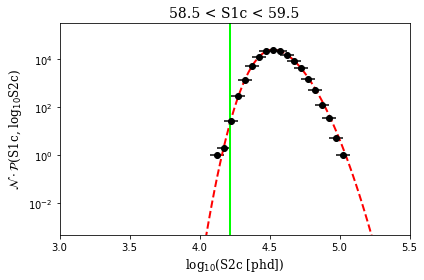

58 60.5 59.5
115826.0
Plotting....
[4.46352256e+00 1.27673549e-01 1.43356088e+00 5.80622612e+03]


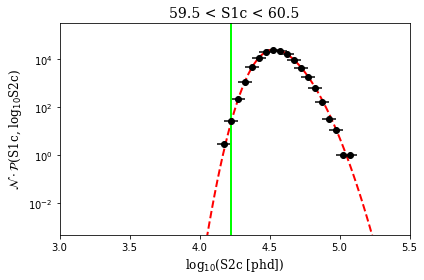

59 61.5 60.5
115222.0
Plotting....
[4.46857330e+00 1.27456950e-01 1.41326693e+00 5.77122409e+03]


60 62.5 61.5
115100.0
Plotting....
[4.47383463e+00 1.26683658e-01 1.41609091e+00 5.76233277e+03]


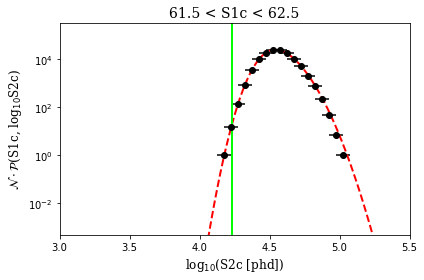

61 63.5 62.5
115389.0
Plotting....
[4.47938192e+00 1.25946229e-01 1.39670518e+00 5.77402337e+03]


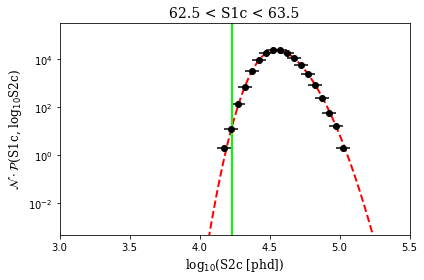

62 64.5 63.5
115297.0
Plotting....
[4.48383914e+00 1.26233678e-01 1.38077290e+00 5.77361926e+03]


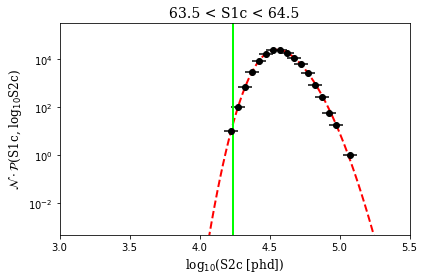

63 65.5 64.5
115523.0
Plotting....
[4.48913588e+00 1.25474765e-01 1.35966360e+00 5.78759707e+03]


64 66.5 65.5
115531.0
Plotting....
[4.49375200e+00 1.25467962e-01 1.38125953e+00 5.78255519e+03]


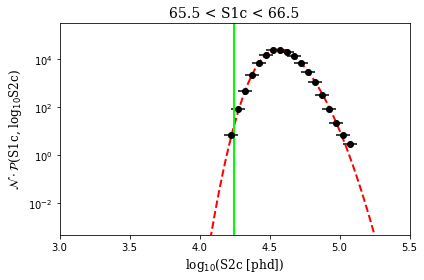

65 67.5 66.5
115257.0
Plotting....
[4.49663177e+00 1.27276202e-01 1.42538186e+00 5.77045119e+03]


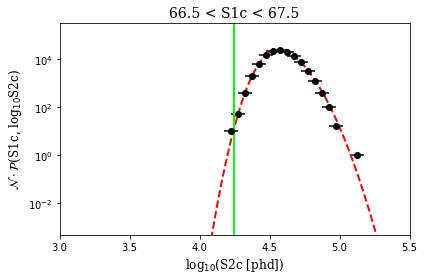

66 68.5 67.5
115462.0
Plotting....
[4.50283947e+00 1.25670796e-01 1.38556322e+00 5.77722342e+03]


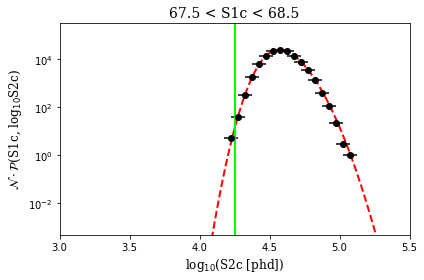

67 69.5 68.5
115901.0
Plotting....
[4.50769694e+00 1.25530516e-01 1.36572543e+00 5.80335053e+03]


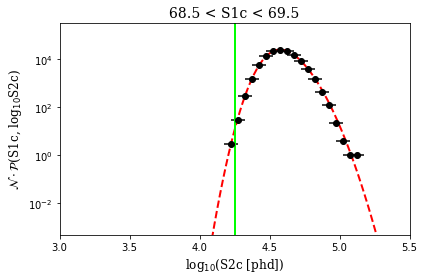

68 70.5 69.5
115450.0
Plotting....
[4.50926000e+00 1.27962754e-01 1.47654416e+00 5.78423735e+03]


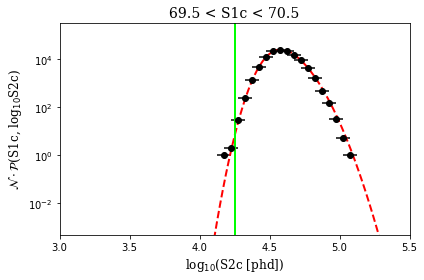

69 71.5 70.5
115879.0
Plotting....
[4.51398537e+00 1.27488299e-01 1.45451334e+00 5.80370408e+03]


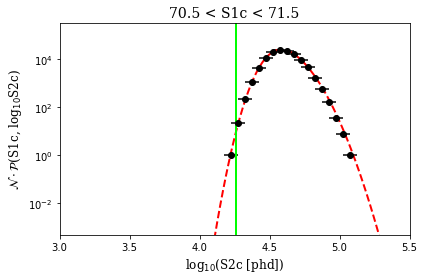

70 72.5 71.5
115764.0
Plotting....
[4.51919314e+00 1.26462241e-01 1.41295449e+00 5.79857840e+03]


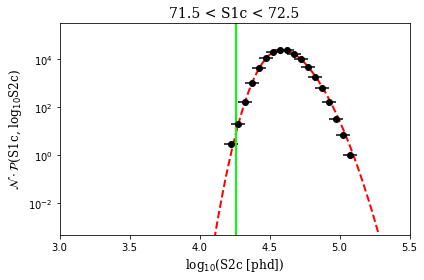

71 73.5 72.5
115507.0
Plotting....
[4.52225324e+00 1.28007935e-01 1.46639798e+00 5.78505255e+03]


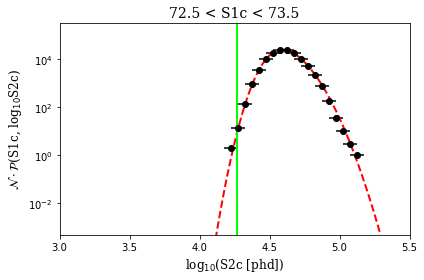

72 74.5 73.5
116459.0
Plotting....
[4.52856316e+00 1.25536574e-01 1.39060542e+00 5.83234869e+03]


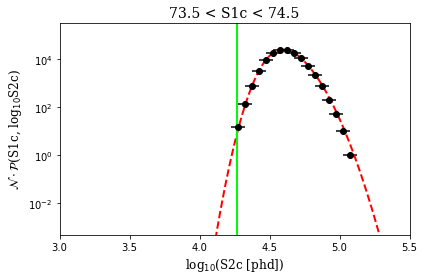

73 75.5 74.5
115556.0
Plotting....
[4.53271675e+00 1.25957890e-01 1.39792239e+00 5.78795161e+03]


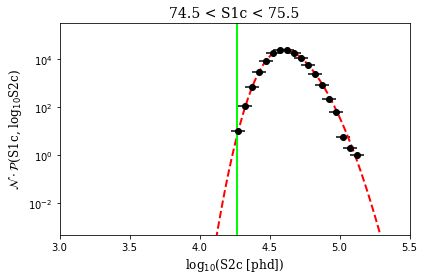

74 76.5 75.5
116003.0
Plotting....
[4.53836840e+00 1.25075217e-01 1.38181552e+00 5.80459641e+03]


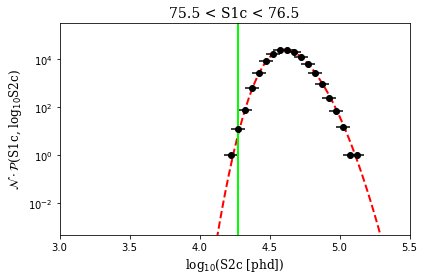

75 77.5 76.5
115992.0
Plotting....
[4.54115376e+00 1.25623196e-01 1.41952834e+00 5.79875636e+03]


76 78.5 77.5
115322.0
Plotting....
[4.54434387e+00 1.26217538e-01 1.43659510e+00 5.76744516e+03]


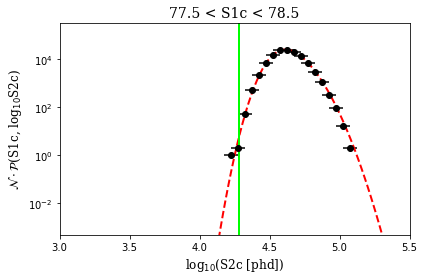

77 79.5 78.5
116225.0
Plotting....
[4.54979422e+00 1.25812417e-01 1.39512479e+00 5.81701504e+03]


78 80.5 79.5
116085.0
Plotting....
[4.55305516e+00 1.26150792e-01 1.41156951e+00 5.81522362e+03]


79 81.5 80.5
115606.0
Plotting....
[4.55832172e+00 1.25260144e-01 1.39825749e+00 5.78785771e+03]


80 82.5 81.5
115666.0
Plotting....
[4.56186911e+00 1.25474147e-01 1.40897945e+00 5.78751358e+03]


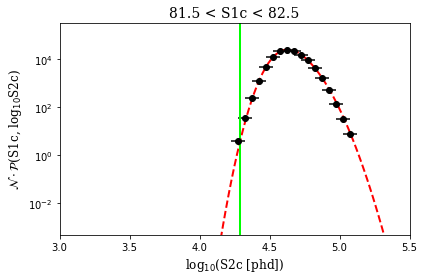

81 83.5 82.5
116458.0
Plotting....
[4.56585963e+00 1.25665139e-01 1.40254315e+00 5.83320682e+03]


82 84.5 83.5
116647.0
Plotting....
[4.56839708e+00 1.26188546e-01 1.44759477e+00 5.84287405e+03]


83 85.5 84.5
116532.0
Plotting....
[4.57554572e+00 1.23348312e-01 1.34647679e+00 5.82847568e+03]


84 86.5 85.5
116183.0
Plotting....
[4.57514722e+00 1.27011967e-01 1.45957335e+00 5.81605178e+03]


85 87.5 86.5
115922.0
Plotting....
[4.58119779e+00 1.24940186e-01 1.40129113e+00 5.80450787e+03]


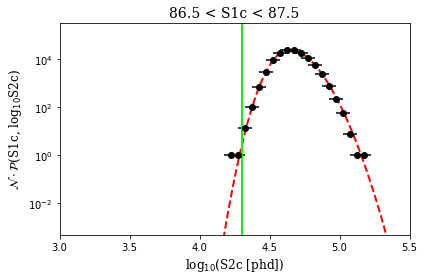

86 88.5 87.5
116401.0
Plotting....
[4.58612619e+00 1.23959092e-01 1.37458600e+00 5.82298979e+03]


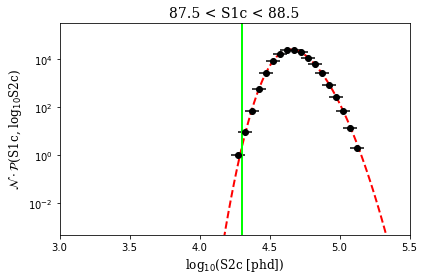

87 89.5 88.5
116799.0
Plotting....
[4.58862250e+00 1.25350889e-01 1.42239053e+00 5.84140362e+03]


88 90.5 89.5
116088.0
Plotting....
[4.59094987e+00 1.26402507e-01 1.46265884e+00 5.80485947e+03]


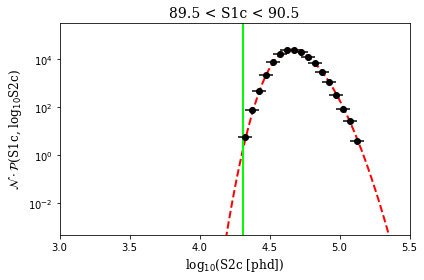

89 91.5 90.5
116581.0
Plotting....
[4.59625883e+00 1.24990048e-01 1.40926269e+00 5.83604741e+03]


90 92.5 91.5
116583.0
Plotting....
[4.60057794e+00 1.24984136e-01 1.39774262e+00 5.83483273e+03]


91 93.5 92.5
116456.0
Plotting....
[4.60428483e+00 1.24323611e-01 1.39645741e+00 5.82364327e+03]


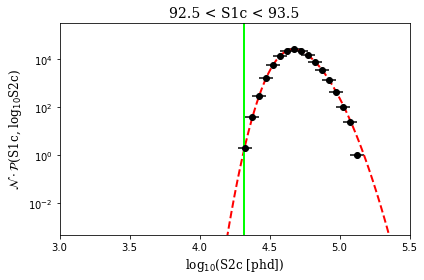

92 94.5 93.5
116625.0
Plotting....
[4.60488475e+00 1.26274166e-01 1.47568073e+00 5.83127186e+03]


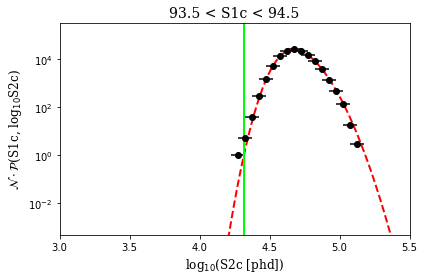

93 95.5 94.5
117166.0
Plotting....
[4.60950067e+00 1.26015126e-01 1.44407456e+00 5.86064328e+03]


94 96.5 95.5
116741.0
Plotting....
[4.61515771e+00 1.24644509e-01 1.41148784e+00 5.83554424e+03]


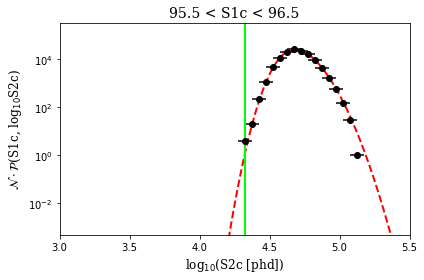

95 97.5 96.5
116842.0
Plotting....
[4.61673956e+00 1.26052017e-01 1.47295192e+00 5.84069877e+03]


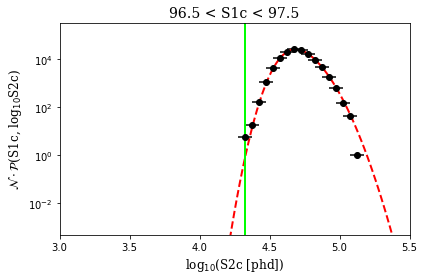

96 98.5 97.5
116974.0
Plotting....
[4.61893146e+00 1.27202672e-01 1.50649302e+00 5.85649671e+03]


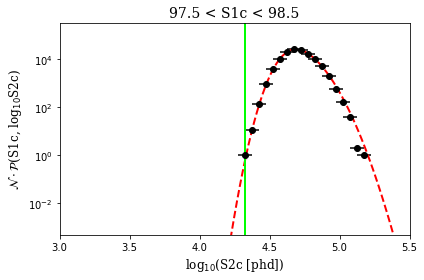

97 99.5 98.5
117706.0
Plotting....
[4.62447730e+00 1.25737855e-01 1.44951079e+00 5.89121486e+03]


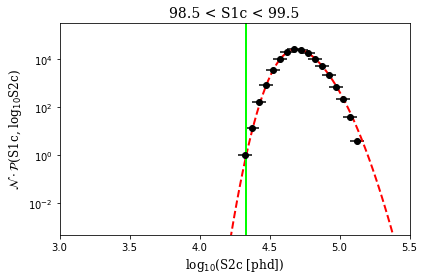

98 100.5 99.5
117094.0
Plotting....
[4.62956689e+00 1.24258415e-01 1.39616326e+00 5.85585899e+03]


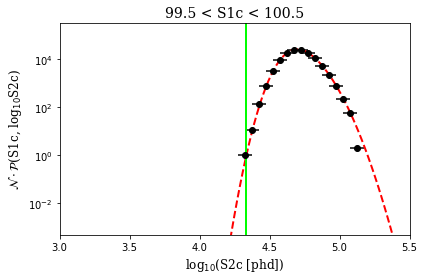

...Done!


In [10]:
X, XI, OMEGA, ALPHA, NORM = [], [], [], [], []
X_ERR, XI_ERR, OMEGA_ERR, ALPHA_ERR, NORM_ERR = [], [], [], [], []

for i in range(nS1Bins):  #get the i-th S1 bin
    print(i, histX[i+1], histX[i])
    binCenters, probValues = [], []
    s1BinWidth = histX[i+1]-histX[i]
    yErr = []
    for j in range(len(histZ[i])): #loop through the j bins of logS2 in this i-th S1 bin
        if (histZ[i][j] == 0.):
            continue
        binWidth = histY[j+1]-histY[j] #in logspace
        binCenters.append( histY[j] + binWidth/2. )  #in log-space
        linWidth = 10.**histY[j+1] - 10.**histY[j]   # width of the bin in linear space ( units : phd )
        #divide the histogram values for this S1 bin by the 2D areas of each bin (unts: phd^2)
        #area = s1BinWidth*linWidth #phd*phd
        probValues.append( float(histZ[i][j]) )
        yErr.append( np.sqrt(sum(histZ[i])) )
    thisNorm = sum(histZ[i])
    print(sum(histZ[i]))
    popt, pcov = curve_fit(skewGauss, binCenters, probValues, \
                           p0=[np.median(binCenters), 0.1, 1., thisNorm], \
                           bounds=([logS2Min, 0., -1., 0.], [logS2Max, 1., 4., 1e7]))
    perr = np.sqrt(np.diag(pcov))
    fitY = []
    fitX = np.linspace( logS2Min, logS2Max, 100)
    for k in range(len(fitX)):
        fitY.append( skewGauss(fitX[k], *popt) )
    print("Plotting....")
    print(popt)
    plt.errorbar( binCenters, probValues, xerr = binWidth, fmt = 'k o' )
    plt.plot( fitX, fitY, 'r--', lw = 2)
    plt.plot( [medians[i], medians[i]], [0.5e-3, 300000], 'lime', lw=2, ms = 0)
    plt.yscale('log')
    plt.title(str(histX[i])+' < S1c < '+str(histX[i+1]), fontsize = 14, family='serif')
    plt.xlabel(r'log$_{10}$(S2c [phd])', fontsize = 12, family='serif')
    plt.ylabel(r'$\mathcal{N}\cdot\mathcal{P}$(S1c, log$_{10}$S2c)', fontsize = 12, family='serif')
    plt.xlim(3.0, logS2Max)
    plt.ylim(0.5e-3, 300000)
    plt.tight_layout()
    plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/skewFit_S1_"+str(int(histX[i]+0.5))+".png"
    plt.savefig(plotName)
    plt.show()
    X.append( np.mean([histX[i], histX[i+1]]) )
    X_ERR.append( 0.5 )
    XI.append( popt[0] )
    XI_ERR.append( perr[0] )
    OMEGA.append( popt[1] )
    OMEGA_ERR.append( perr[1] )
    ALPHA.append( popt[2] )
    ALPHA_ERR.append( perr[2] )
    NORM.append( popt[3] ) #/float(totalEvents) )
    NORM_ERR.append( perr[3] ) #/float(totalEvents) )
        
print("...Done!")      

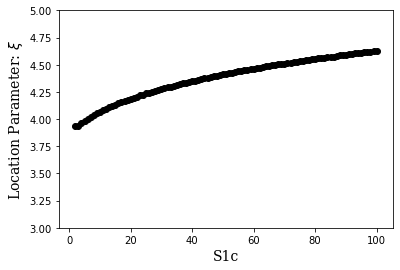

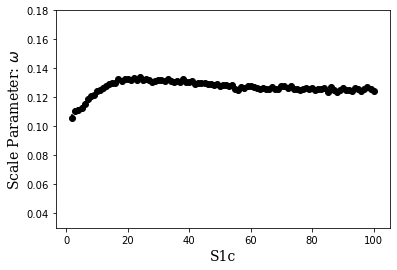

In [11]:
plt.errorbar(X, XI, xerr=X_ERR, yerr=XI_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Location Parameter: $\xi$', fontsize = 14, family = 'serif')
plt.ylim( 3., 5. )
plt.show()

plt.errorbar(X, OMEGA, xerr=X_ERR, yerr=OMEGA_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif'  )
plt.ylabel( r'Scale Parameter: $\omega$', fontsize = 14, family = 'serif' )
plt.ylim( 0.03, 0.18)
plt.show()

plt.errorbar(X, ALPHA, xerr=X_ERR, yerr=ALPHA_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif'  )
plt.ylabel( r'Shape Parameter: $\alpha$', fontsize = 14, family = 'serif' )
plt.ylim( -3., 3.)
plt.show()

plt.errorbar(X, NORM, xerr=X_ERR, yerr=NORM_ERR, fmt = 'k o')
plt.xlabel( 'S1c', fontsize = 14, family = 'serif'  )
plt.ylabel( r'Normalization Parameter: A', fontsize = 14, family = 'serif' )
#plt.ylim(0., 500)
plt.show()


In [12]:
#try some functions to fit the skew parameters as functions of S1
def XI_FUNC(x, a, b, c):
    return a*(x+b)**0.25 + c

poptXI, pcov = curve_fit( XI_FUNC, X, XI )
perrXI = np.sqrt(np.diag(pcov))
print( poptXI, perrXI )

fitY = []
for i in range(len(X)):
    fitY.append( XI_FUNC(X[i], *poptXI))

    
plt.errorbar(X, XI, xerr=X_ERR, yerr=XI_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r--', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Location Parameter: $\xi$', fontsize = 14, family = 'serif')
plt.ylim(3, 5)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/skewFits_locationParameters.png"
plt.savefig(plotName)
plt.show()

[0.46313043 5.870528   3.14377948] [0.00136922 0.12451148 0.00451495]


[ 1.29846754e+01  3.45178351e+02  4.91860252e-04 -3.63595327e+01] [2.57815398e-01 1.36378805e+01 1.00336912e-05 8.62159118e-01]


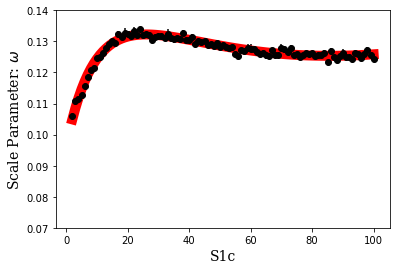

In [13]:
def OMEGA_FUNC(x, a, b,c, d):
    return a/(x-d) - b/(x-d)**2 + c*x
poptOMEGA, pcov = curve_fit( OMEGA_FUNC, X, OMEGA )
perrOMEGA = np.sqrt(np.diag(pcov))
print( poptOMEGA, perrOMEGA )

fitY = []
for i in range(len(X)):
    fitY.append( OMEGA_FUNC(X[i], *poptOMEGA))

    
plt.errorbar(X, OMEGA, xerr=X_ERR, yerr=OMEGA_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Scale Parameter: $\omega$', fontsize = 14, family = 'serif')
plt.ylim(0.07, 0.14)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/skewFits_scaleParameters.png"
plt.savefig(plotName)
plt.show()

In [14]:
'''def func(x, a, b, c, d):
    return a*np.log(x - b)/x**c + d'''
def ALPHA_FUNC(x, a, b, c, d):
    return a/(x-d) - b/(x-d)**2 + c*(x-d)

poptALPHA, pcov = curve_fit( ALPHA_FUNC, X, ALPHA )
perrALPHA = np.sqrt(np.diag(pcov))
print( poptALPHA, perrALPHA )

fitY = []
for i in range(len(X)):
    fitY.append( ALPHA_FUNC(X[i], *poptALPHA))

    
plt.errorbar(X, ALPHA, xerr=X_ERR, yerr=ALPHA_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Shape Parameter: $\alpha$', fontsize = 14, family = 'serif')
plt.ylim(0.5, 3.)
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/skewFits_shapeParameters.png"
plt.savefig(plotName)
plt.show()

[ 7.72068063e+01  8.66195911e+02  7.19736302e-03 -1.09263103e+01] [2.28524901e+00 5.44106097e+01 2.53020859e-04 5.23537050e-01]


In [15]:
def NORM_FUNC(x, a, b, c ):
    return abs(a/(x)**(1.5) + c/(x**3) + b)

poptNORM, pcov = curve_fit( NORM_FUNC, X, NORM )
perrNORM = np.sqrt(np.diag(pcov))
print( poptNORM, perrNORM )

fitY = []
for i in range(len(X)):
    fitY.append( NORM_FUNC(X[i], *poptNORM))

    
plt.errorbar(X, NORM, xerr=X_ERR, fmt = 'k o')
plt.plot(X, fitY, 'r', lw = 10)
plt.xlabel( 'S1c', fontsize = 14, family = 'serif' )
plt.ylabel( r'Normalization', fontsize = 14, family = 'serif')
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/skewFits_normalizations.png"
plt.savefig(plotName)
plt.show()

[ 19995.08631897   5779.87474859 -86644.25084722] [ 470.41138272    8.20967957 1541.65511778]


# Put it all together to make the PDF(S1, logS2) function
### Generate events uniformly in S1-logS2 space, and plot the PDF values to compare with the input histogram

In [16]:
def PDF( S1c, logS2c ):
    xi = XI_FUNC(S1c, *poptXI)
    omega = OMEGA_FUNC(S1c, *poptOMEGA)
    alpha = ALPHA_FUNC(S1c, *poptALPHA)
    norm = NORM_FUNC(S1c, *poptNORM)/totalEvents

    prob = skewGauss(logS2c , xi, omega, alpha, norm)
    if prob < 0.:
        print(S1c, logS2c, xi, omega, alpha, norm)
    return prob
        
s1 = np.linspace(s1Min, s1Max, 250)
ls2 = np.linspace(logS2Min, logS2Max, 250)
P = []
print("Starting")
thresh = 0.
pS1, pLogS2 = [], []
for i in range(len(s1)):
    #print(i)
    if (float(i)/float(len(s1))*100.) >= thresh:
        print( '%i / 100' % thresh)
        thresh += 10.
    for j in range(len(ls2)):
        #print(j)
        pS1.append( s1[i] )
        pLogS2.append( ls2[j] )
        P.append( PDF(s1[i], ls2[j]) )
        
print("....Done!")

Starting
0 / 100
10 / 100
20 / 100
30 / 100
40 / 100
50 / 100
60 / 100
70 / 100
80 / 100
90 / 100
....Done!


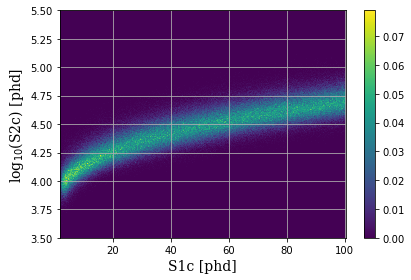

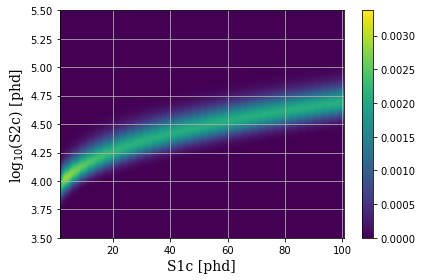

Done!


In [17]:
cm = plt.cm.get_cmap('viridis')

h = plt.hist2d(S1, logS2, bins=(nS1Bins*20, nS2Bins*20), range=([s1Min, s1Max], [logS2Min, logS2Max]), density=True)#, range=([1.5, 100.5], [500, 50000]))
plt.colorbar(h[3])
plt.xlim(s1Min, s1Max)
plt.ylim(logS2Min, logS2Max)
plt.xlabel('S1c [phd]', fontsize = 14, family='serif')
plt.ylabel(r'log$_{10}$(S2c) [phd]', fontsize = 14, family='serif')
plt.grid()
plt.tight_layout()
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/s1LogS2_histogram.png"
plt.savefig(plotName)
plt.show()


#plt.hist2d( plotS1, plotS2, bins = 200, norm=LogNorm())

sc = plt.scatter( pS1, pLogS2, c=P, s=10, cmap = cm)
#sc = plt.scatter( field, QY, c = chi2, s = 1.5, cmap = cm)
plt.colorbar(sc)
plt.xlim(1.5, 100.5)
plt.xlabel('S1c [phd]', fontsize = 14, family='serif')
plt.ylabel(r'log$_{10}$(S2c) [phd]', fontsize = 14, family='serif')
plt.grid()
#plt.yscale('log')
plt.ylim(logS2Min, logS2Max)
plt.tight_layout()
plotName = "/network/rit/lab/szydagislab/GR/NEST/v2.1.0/build/skewFits/s1LogS2_analytical.png"
plt.savefig(plotName)
plt.show()


print('Done!')